In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Prophet - 외생변수 추가(C1-C7, M1-M7) : 특성중요도 미반영


In [ ]:
# Prophet - 외생변수 추가(C1~C7, M1~M7)

In [3]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

# 데이터 불러오기 (ds: 날짜, y: 종속변수)
df3 = pd.read_excel('/content/drive/MyDrive/workspace/dddata.xlsx')

In [4]:
df3.head()

,Unnamed: 0,일자,C1,C2,C3,C4,C5,C6,C7,M1,M2,M3,M4,M5,M6,M7,expenditure_tour
0,0,20221029,8,1,0,3,0,0,0,0,0,12,0,0,0,0,47794532000
1,1,20221030,1289,326,152,422,64,61,3,226,3,1560,295,193,7,33,37155395000
2,2,20221031,1380,516,273,189,215,120,6,486,12,1711,294,159,27,10,29237326000
3,3,20221101,1037,359,174,117,124,101,5,321,7,1106,241,178,55,9,29130528000
4,4,20221102,1077,319,189,57,109,59,19,301,0,1175,197,71,82,3,30257440000


In [5]:

# df3 = df3[['일자', 'expenditure_tour']]
df3 = df3.drop('Unnamed: 0', axis=1)
df3 = df3.rename(columns={'일자': 'ds', 'expenditure_tour': 'y'})
df3['ds'] = pd.to_datetime(df3['ds'].astype(str), format='%Y%m%d')
df3.head()


# 훈련/검증 데이터셋 생성.
# 데이터 길이 확인
n = len(df3)
# 80%까지를 훈련 데이터로 사용
train_size = int(n * 0.7)
train_size
# 시간 순서대로 데이터 분할
df3_train = df3.iloc[:train_size]
df3_test = df3.iloc[train_size:]

# 파라미터 탐색을 위한 그리드 서치
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

best_params = None
best_rmse = float('inf')

# 최적 파라미터 탐색
for params in ParameterGrid(param_grid):
    model2 = Prophet(**params)

    # 외부 변수 추가
    for i in range(1, 8):  # C1~C7
      model2.add_regressor(f'C{i}')
      print(f'C{i}')
    for i in range(1, 8):  # M1~M7
      print(f'M{i}')
      model2.add_regressor(f'M{i}')

    model2.fit(df3_train)

    # 예측 데이터 생성
    # future = model2.make_future_dataframe(periods=len(df3_test)+13, freq='d', include_history=False)
    future = pd.DataFrame({'ds': df3_test['ds']})
    print('future: ', future)

    for i in range(1, 8):
      future[f'C{i}'] = df3_test[f'C{i}'].values    # 테스트 데이터의 외부 변수 추가
    for i in range(1, 8):
      future[f'M{i}'] = df3_test[f'M{i}'].values    # 테스트 데이터의 외부 변수 추가


    # 예측 수행
    forecast = model2.predict(future)

    # RMSE 계산
    actual = df3_test['y'].values
    predicted = forecast[-len(df3_test):]['yhat'].values
    rmse = np.sqrt(mean_squared_error(actual, predicted))

    # 최적 파라미터 업데이트
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/8cukldon.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/1vh0muhh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23101', 'data', 'file=/tmp/tmplsq2xkhk/8cukldon.json', 'init=/tmp/tmplsq2xkhk/1vh0muhh.json', 'output', 'file=/tmp/tmplsq2xkhk/prophet_model9xxsh872/prophet_model-20241022105521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


C1
C2
C3
C4
C5
C6
C7
M1
M2
M3
M4
M5
M6
M7
future:              ds
259 2023-07-24
260 2023-07-25
261 2023-07-26
262 2023-07-27
263 2023-07-28
..         ...
365 2023-11-24
366 2023-11-26
367 2023-11-28
368 2023-11-29
369 2023-11-30

[111 rows x 1 columns]


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/js8ty4uu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/5p_skb1n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78370', 'data', 'file=/tmp/tmplsq2xkhk/js8ty4uu.json', 'init=/tmp/tmplsq2xkhk/5p_skb1n.json', 'output', 'file=/tmp/tmplsq2xkhk/prophet_model5d72v6w2/prophet_model-20241022105522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


C1
C2
C3
C4
C5
C6
C7
M1
M2
M3
M4
M5
M6
M7
future:              ds
259 2023-07-24
260 2023-07-25
261 2023-07-26
262 2023-07-27
263 2023-07-28
..         ...
365 2023-11-24
366 2023-11-26
367 2023-11-28
368 2023-11-29
369 2023-11-30

[111 rows x 1 columns]


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/1xxp6ih6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/0tawt7pa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26841', 'data', 'file=/tmp/tmplsq2xkhk/1xxp6ih6.json', 'init=/tmp/tmplsq2xkhk/0tawt7pa.json', 'output', 'file=/tmp/tmplsq2xkhk/prophet_modelucjr0gbp/prophet_model-20241022105522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


C1
C2
C3
C4
C5
C6
C7
M1
M2
M3
M4
M5
M6
M7
future:              ds
259 2023-07-24
260 2023-07-25
261 2023-07-26
262 2023-07-27
263 2023-07-28
..         ...
365 2023-11-24
366 2023-11-26
367 2023-11-28
368 2023-11-29
369 2023-11-30

[111 rows x 1 columns]


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/68peof0e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/nilv4q7a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25772', 'data', 'file=/tmp/tmplsq2xkhk/68peof0e.json', 'init=/tmp/tmplsq2xkhk/nilv4q7a.json', 'output', 'file=/tmp/tmplsq2xkhk/prophet_model2_5r_x2w/prophet_model-20241022105522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


C1
C2
C3
C4
C5
C6
C7
M1
M2
M3
M4
M5
M6
M7
future:              ds
259 2023-07-24
260 2023-07-25
261 2023-07-26
262 2023-07-27
263 2023-07-28
..         ...
365 2023-11-24
366 2023-11-26
367 2023-11-28
368 2023-11-29
369 2023-11-30

[111 rows x 1 columns]


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/gdkx78mq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/cc52toy0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48922', 'data', 'file=/tmp/tmplsq2xkhk/gdkx78mq.json', 'init=/tmp/tmplsq2xkhk/cc52toy0.json', 'output', 'file=/tmp/tmplsq2xkhk/prophet_modelt4o7xnyy/prophet_model-20241022105522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


C1
C2
C3
C4
C5
C6
C7
M1
M2
M3
M4
M5
M6
M7
future:              ds
259 2023-07-24
260 2023-07-25
261 2023-07-26
262 2023-07-27
263 2023-07-28
..         ...
365 2023-11-24
366 2023-11-26
367 2023-11-28
368 2023-11-29
369 2023-11-30

[111 rows x 1 columns]


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/df_vg0r7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/yb5vmokg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77767', 'data', 'file=/tmp/tmplsq2xkhk/df_vg0r7.json', 'init=/tmp/tmplsq2xkhk/yb5vmokg.json', 'output', 'file=/tmp/tmplsq2xkhk/prophet_modele6icudj5/prophet_model-20241022105523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


C1
C2
C3
C4
C5
C6
C7
M1
M2
M3
M4
M5
M6
M7
future:              ds
259 2023-07-24
260 2023-07-25
261 2023-07-26
262 2023-07-27
263 2023-07-28
..         ...
365 2023-11-24
366 2023-11-26
367 2023-11-28
368 2023-11-29
369 2023-11-30

[111 rows x 1 columns]


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/2cb9fmur.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/1tsxehjv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84767', 'data', 'file=/tmp/tmplsq2xkhk/2cb9fmur.json', 'init=/tmp/tmplsq2xkhk/1tsxehjv.json', 'output', 'file=/tmp/tmplsq2xkhk/prophet_model4j5k8em4/prophet_model-20241022105523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


C1
C2
C3
C4
C5
C6
C7
M1
M2
M3
M4
M5
M6
M7
future:              ds
259 2023-07-24
260 2023-07-25
261 2023-07-26
262 2023-07-27
263 2023-07-28
..         ...
365 2023-11-24
366 2023-11-26
367 2023-11-28
368 2023-11-29
369 2023-11-30

[111 rows x 1 columns]


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/p5s7hqsq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/cn8o_8xp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4484', 'data', 'file=/tmp/tmplsq2xkhk/p5s7hqsq.json', 'init=/tmp/tmplsq2xkhk/cn8o_8xp.json', 'output', 'file=/tmp/tmplsq2xkhk/prophet_modelw2aox5ds/prophet_model-20241022105523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


C1
C2
C3
C4
C5
C6
C7
M1
M2
M3
M4
M5
M6
M7
future:              ds
259 2023-07-24
260 2023-07-25
261 2023-07-26
262 2023-07-27
263 2023-07-28
..         ...
365 2023-11-24
366 2023-11-26
367 2023-11-28
368 2023-11-29
369 2023-11-30

[111 rows x 1 columns]


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/j6i_o8in.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/inins2ep.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39503', 'data', 'file=/tmp/tmplsq2xkhk/j6i_o8in.json', 'init=/tmp/tmplsq2xkhk/inins2ep.json', 'output', 'file=/tmp/tmplsq2xkhk/prophet_model5sbotii6/prophet_model-20241022105524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


C1
C2
C3
C4
C5
C6
C7
M1
M2
M3
M4
M5
M6
M7
future:              ds
259 2023-07-24
260 2023-07-25
261 2023-07-26
262 2023-07-27
263 2023-07-28
..         ...
365 2023-11-24
366 2023-11-26
367 2023-11-28
368 2023-11-29
369 2023-11-30

[111 rows x 1 columns]


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/m1ec80_i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/ud3dbj5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87030', 'data', 'file=/tmp/tmplsq2xkhk/m1ec80_i.json', 'init=/tmp/tmplsq2xkhk/ud3dbj5g.json', 'output', 'file=/tmp/tmplsq2xkhk/prophet_modelvtxpffhj/prophet_model-20241022105524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


C1
C2
C3
C4
C5
C6
C7
M1
M2
M3
M4
M5
M6
M7
future:              ds
259 2023-07-24
260 2023-07-25
261 2023-07-26
262 2023-07-27
263 2023-07-28
..         ...
365 2023-11-24
366 2023-11-26
367 2023-11-28
368 2023-11-29
369 2023-11-30

[111 rows x 1 columns]


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/giwwcg2l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/twj8qzap.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89770', 'data', 'file=/tmp/tmplsq2xkhk/giwwcg2l.json', 'init=/tmp/tmplsq2xkhk/twj8qzap.json', 'output', 'file=/tmp/tmplsq2xkhk/prophet_modelitw1xgn9/prophet_model-20241022105524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


C1
C2
C3
C4
C5
C6
C7
M1
M2
M3
M4
M5
M6
M7
future:              ds
259 2023-07-24
260 2023-07-25
261 2023-07-26
262 2023-07-27
263 2023-07-28
..         ...
365 2023-11-24
366 2023-11-26
367 2023-11-28
368 2023-11-29
369 2023-11-30

[111 rows x 1 columns]


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/flvrxlsc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/y5jtk1yd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57407', 'data', 'file=/tmp/tmplsq2xkhk/flvrxlsc.json', 'init=/tmp/tmplsq2xkhk/y5jtk1yd.json', 'output', 'file=/tmp/tmplsq2xkhk/prophet_model2ham70mp/prophet_model-20241022105525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


C1
C2
C3
C4
C5
C6
C7
M1
M2
M3
M4
M5
M6
M7
future:              ds
259 2023-07-24
260 2023-07-25
261 2023-07-26
262 2023-07-27
263 2023-07-28
..         ...
365 2023-11-24
366 2023-11-26
367 2023-11-28
368 2023-11-29
369 2023-11-30

[111 rows x 1 columns]


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/ikkt6frg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/ih26vj5l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56353', 'data', 'file=/tmp/tmplsq2xkhk/ikkt6frg.json', 'init=/tmp/tmplsq2xkhk/ih26vj5l.json', 'output', 'file=/tmp/tmplsq2xkhk/prophet_modelvcxuj4q0/prophet_model-20241022105525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


C1
C2
C3
C4
C5
C6
C7
M1
M2
M3
M4
M5
M6
M7


10:55:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/f9wcnwvs.json


future:              ds
259 2023-07-24
260 2023-07-25
261 2023-07-26
262 2023-07-27
263 2023-07-28
..         ...
365 2023-11-24
366 2023-11-26
367 2023-11-28
368 2023-11-29
369 2023-11-30

[111 rows x 1 columns]
C1
C2
C3
C4
C5
C6
C7
M1
M2
M3
M4
M5
M6
M7


DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/nid31dol.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72441', 'data', 'file=/tmp/tmplsq2xkhk/f9wcnwvs.json', 'init=/tmp/tmplsq2xkhk/nid31dol.json', 'output', 'file=/tmp/tmplsq2xkhk/prophet_modeljc3y4hqz/prophet_model-20241022105525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


future:              ds
259 2023-07-24
260 2023-07-25
261 2023-07-26
262 2023-07-27
263 2023-07-28
..         ...
365 2023-11-24
366 2023-11-26
367 2023-11-28
368 2023-11-29
369 2023-11-30

[111 rows x 1 columns]
C1
C2
C3
C4
C5
C6
C7
M1
M2
M3
M4
M5
M6
M7


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/9kng49ow.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/tim_y6_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48207', 'data', 'file=/tmp/tmplsq2xkhk/9kng49ow.json', 'init=/tmp/tmplsq2xkhk/tim_y6_z.json', 'output', 'file=/tmp/tmplsq2xkhk/prophet_modelm3rub3bt/prophet_model-20241022105526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

future:              ds
259 2023-07-24
260 2023-07-25
261 2023-07-26
262 2023-07-27
263 2023-07-28
..         ...
365 2023-11-24
366 2023-11-26
367 2023-11-28
368 2023-11-29
369 2023-11-30

[111 rows x 1 columns]
C1
C2
C3
C4
C5
C6
C7
M1
M2
M3
M4
M5
M6
M7


DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/xrsyxq0r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23987', 'data', 'file=/tmp/tmplsq2xkhk/38_zpamy.json', 'init=/tmp/tmplsq2xkhk/xrsyxq0r.json', 'output', 'file=/tmp/tmplsq2xkhk/prophet_model07pk1m4w/prophet_model-20241022105526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


future:              ds
259 2023-07-24
260 2023-07-25
261 2023-07-26
262 2023-07-27
263 2023-07-28
..         ...
365 2023-11-24
366 2023-11-26
367 2023-11-28
368 2023-11-29
369 2023-11-30

[111 rows x 1 columns]
Best Parameters: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1}
Best RMSE: 3004540347.490672


In [6]:
# 최적 모델 재학습 및 예측
best_model = Prophet(**best_params)
# 외부 변수 추가
for i in range(1, 8):  # C1~C7
  best_model.add_regressor(f'C{i}')
for i in range(1, 8):  # M1~M7
  best_model.add_regressor(f'M{i}')

best_model.fit(df3_train)

# 미래 데이터프레임 생성
future_best = pd.DataFrame({'ds': df3_test['ds']})  # 테스트 데이터의 날짜 사용
for i in range(1, 8):  # C1~C7
  future_best[f'C{i}'] = df3[f'C{i}'].iloc[train_size:].values
for i in range(1, 8):  # M1~M7
  future_best[f'M{i}'] = df3[f'M{i}'].iloc[train_size:].values

# 예측 수행
forecast_best = best_model.predict(future_best)

# RMSE 계산
actual = df3_test['y'].values
predicted = forecast_best['yhat'].values
rmse = np.sqrt(mean_squared_error(actual, predicted))
print("Best Model RMSE:", rmse)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/o7lo3s2h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsq2xkhk/vy99xjdz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3763', 'data', 'file=/tmp/tmplsq2xkhk/o7lo3s2h.json', 'init=/tmp/tmplsq2xkhk/vy99xjdz.json', 'output', 'file=/tmp/tmplsq2xkhk/prophet_modelp44idr8m/prophet_model-20241022105554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Best Model RMSE: 3004540347.490672


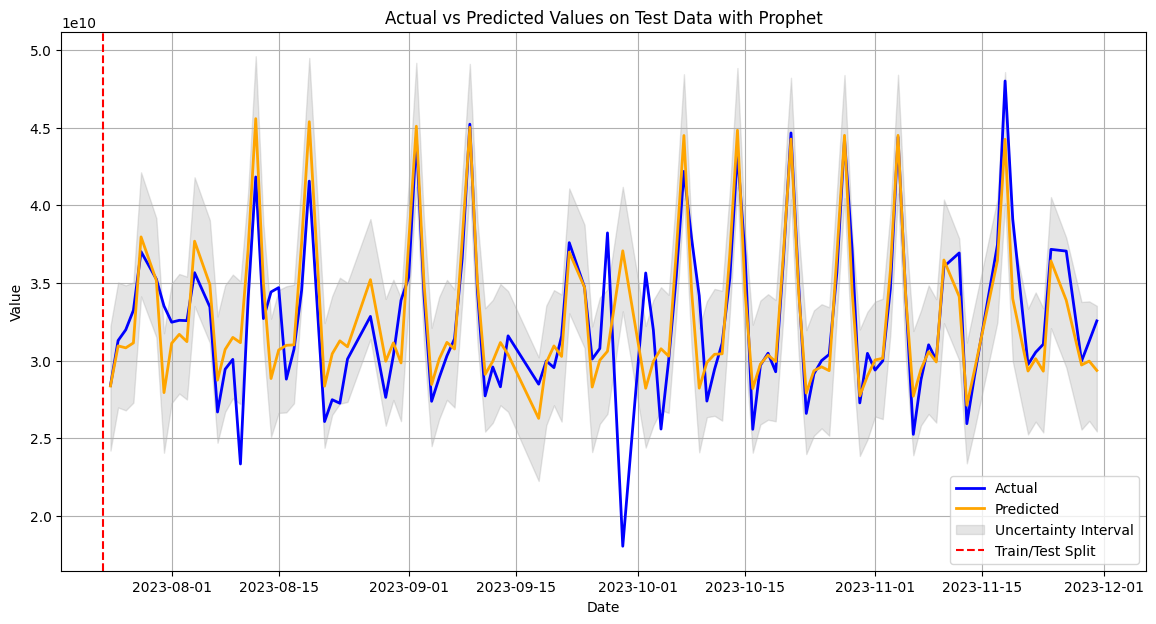

In [7]:
import matplotlib.pyplot as plt

# 예측값과 실제값 비교 시각화 (테스트 데이터만)
plt.figure(figsize=(14, 7))

# 테스트 데이터의 실제값
plt.plot(df3_test['ds'], df3_test['y'], label='Actual', color='blue', linewidth=2)

# 예측값
plt.plot(forecast_best['ds'], forecast_best['yhat'], label='Predicted', color='orange', linestyle='-', linewidth=2)

# 예측값의 불확실성 범위
plt.fill_between(forecast_best['ds'], forecast_best['yhat_lower'], forecast_best['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')

# 훈련/검증 데이터 분할 선
plt.axvline(x=df3['ds'].iloc[train_size - 1], color='red', linestyle='--', label='Train/Test Split')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values on Test Data with Prophet')
plt.grid()
plt.show()


In [8]:
# MAPE (Mean Absolute Percentage Error) 계산
mape = np.mean(np.abs((actual - predicted) / actual)) * 100
print('The MAPE of ARIMAX is:', mape, '%')

The MAPE of ARIMAX is: 6.297502112135514 %


In [ ]:
end = pd.DataFrame({'Predicted' : predicted, 'Actual' : actual})
end.to_excel('Prophet_res.xlsx')